<a href="https://colab.research.google.com/github/peter000815/BA0815/blob/master/heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files
uploaded_files = files.upload()

Saving US_COVID.csv to US_COVID.csv


In [24]:
from google.colab import files
uploaded_files = files.upload()

Saving 123.csv to 123.csv


In [25]:
import pandas as pd
CSV_FILE_PATH= '123.csv'
df = pd.read_csv(CSV_FILE_PATH)
df.head()


,date,state,fips,cases,deaths,Unnamed: 5,Unnamed: 6
0,2020/1/31,Arizona,4,1,0,NaN,NaN
1,2020/1/31,California,6,3,0,NaN,NaN
2,2020/1/31,Illinois,17,2,0,NaN,NaN
3,2020/1/31,Washington,53,1,0,NaN,NaN
4,2020/2/15,Arizona,4,1,0,NaN,NaN


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

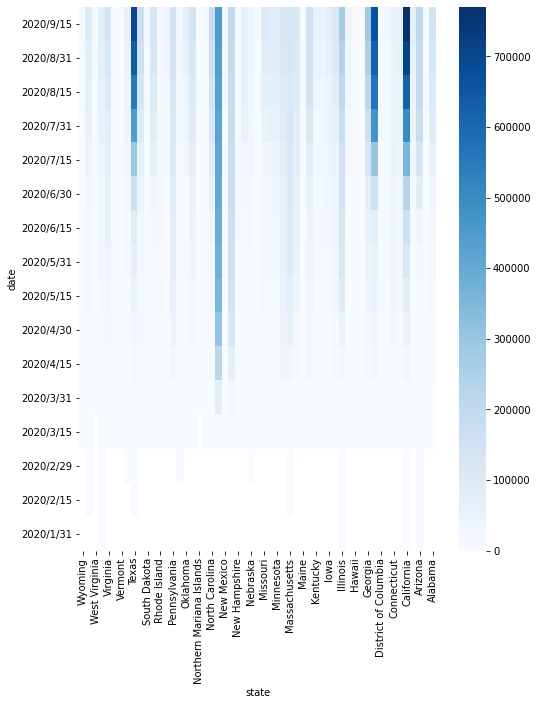

In [35]:
dt = pd.pivot_table(df, index=['date'], columns=['state'], values=['cases'], aggfunc=[max]) 

# 找到最大值、最大值所对应的索引
max_value, max_idx = dt.stack().max(), dt.stack().idxmax()


# 透视图变成了多重索引(MultiIndex)，重新调整一下
new_col = dt.columns.levels[2]
dt.columns = new_col
# dt.index = list(dt.index)

dt.sort_index(axis=0, ascending=False, inplace=True)  # 必要时将索引重新排序
dt.sort_index(axis=1, ascending=False, inplace=True)  # 必要时将索引重新排序

# 绘制热力图，横轴为网络层数，纵轴为激活函数，
# 栅格的颜色代表训练结果，颜色越深结果越好
plt.figure(figsize=(8, 10))
g = sns.heatmap(dt, vmin=0.0, annot=False, fmt='.2g', cmap='Blues', cbar=True)
plt.show()